<a href="https://colab.research.google.com/github/HamedFarahani89/AI-Lab/blob/main/Class_ANN_DUDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro OOP

In [1]:
# class is like a blueprint for a set of attributes (Variables) and methods (Functions)
# instance is an example
# class is a cookie cutter, instance is an individual cookie

class model(object):

  # mthods of objects are functions defined in class
  # constructor method
  def __init__(self,numlayers,numunits,name): # self is the first and sometimes only input,
                                              # but here we have 'numlayers','numunits','name' as variables
    self.layers  = numlayers
    self.units   = numunits # these are attributes of object
    self.name    = name

  # other methods
  def howManyUnits(self):
    totalUnits = self.layers * self.units
    print(f'There are {totalUnits} units in the model.')

In [2]:
# create an instance and check it
ex = model(2,3,'cnn') # create instance
print(ex)
print('')
print(ex.howManyUnits()) #run this 'howManyUnits' method


There are 6 units in the model.
None


## Exercise:
create a new class so that

1) the weights is a layers-by-units matrix,

2) the weights are changed by multiplying by input x and summing input y

In [3]:
import numpy as np

class model_test(object):

  # constructor method
  def __init__(self,numlayers,numunits,name):
    self.layers  = numlayers
    self.units   = numunits # these are attributes
    self.name    = name
    self.weights = np.zeros((numlayers,numunits))

  def init_w (self):
     self.weights += np.random.random((self.layers, self.units))
     return  self.weights

  # other methods
  def howManyUnits(self):
    totalUnits = self.layers * self.units
    print(f'There are {totalUnits} units in the model.')

  def trainTheModel(self,x, y):
    self.weights = np.dot((self.weights),x) + y
    return self.weights

  def __str__(self):
    return f'This is a {self.name} architecture.'


In [4]:
m_test = model_test(2,3,'tst')
m_test.init_w()

array([[0.72335286, 0.89044031, 0.45600368],
       [0.44518733, 0.34241838, 0.36569826]])

In [5]:
m_test.trainTheModel([[1,2],[1,1],[0,1]], 1)

array([[2.61379317, 3.79314971],
       [1.78760571, 2.59849131]])

# sequential vs. class

In [6]:
# import libraries
import torch
import torch.nn as nn
import numpy as np

# NEW!
import torch.nn.functional as F

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-6-461f9fad97f3>:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


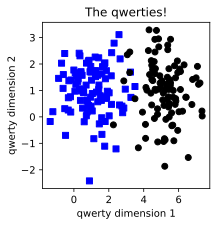

In [7]:
# create data

nPerClust = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(3,3))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [8]:
# # build the model
# ANNclassify = nn.Sequential(
#     nn.Linear(2,1),   # input layer
#     nn.ReLU(),        # activation unit
#     nn.Linear(1,1),   # output unit
#     nn.Sigmoid(),     # final activation unit (here for conceptual reasons; in practice, better to use BCEWithLogitsLoss)
#       )


In [9]:
### define the class

class theClass4ANN(nn.Module):
  def __init__(self):
    super().__init__()

    ### input layer
    self.input = nn.Linear(2,1)

    ### output layer
    self.output = nn.Linear(1,1)

  # forward pass
  def forward(self,x):

    # pass through the input layer
    x = self.input(x)

    # apply relu
    x = F.relu( x )

    # output layer
    x = self.output(x)
    x = torch.sigmoid(x)

    return x


### create an instance of the class
ANNclassify = theClass4ANN()

In [10]:
# other model features

learningRate = .01

# loss function
lossfun = nn.BCELoss()
# Note: You'll learn in the "Metaparameters" section that it's better to use BCEWithLogitsLoss, but this is OK for now.

# optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)


In [11]:
# train the model
numepochs = 2000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):

  # forward pass
  yHat = ANNclassify(data)

  # compute loss
  loss = lossfun(yHat,labels)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

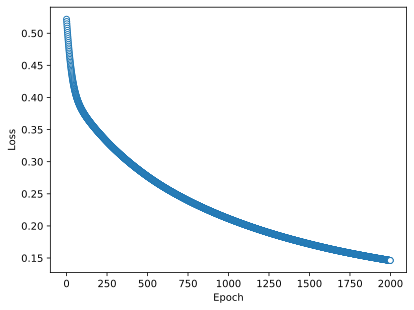

In [12]:
# show the losses

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [13]:
# compute the predictions

# manually compute losses
# final forward pass
predictions = ANNclassify(data)

predlabels = predictions>.5

# find errors
misclassified = np.where(predlabels != labels)[0]

# total accuracy
totalacc = 100-100*len(misclassified)/(2*nPerClust)

print('Final accuracy: %g%%' %totalacc)


Final accuracy: 94.5%


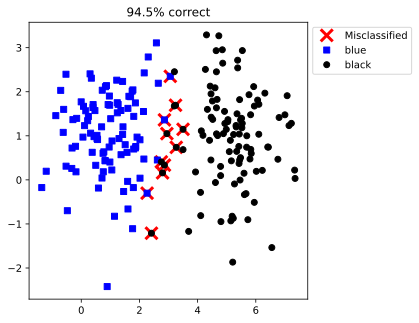

In [14]:
# plot the labeled data
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0] ,data[misclassified,1],'rx',markersize=12,markeredgewidth=3)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0] ,data[np.where(predlabels)[0],1] ,'ko')

plt.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% correct')
plt.show()